In [1]:
#imports 
# Please ensure that you using sklearn version <= 0.23.2 to run all cells 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score,learning_curve,validation_curve
from sklearn.preprocessing import StandardScaler
from sklearn import svm,model_selection,preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,plot_confusion_matrix,precision_recall_fscore_support
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from imblearn.under_sampling import NearMiss

# Jm1 Classification

### Dataset Description 
<li>Jm1 is a dataset created by Nasa to predict software defects</li>
<li>Dataset consists of 22 Attruibutes and 10885 instance</li> 
<li>First 21 attruibutes represents features of the code and last attribute is a boolean value to check if software contain defects or no </li>
<li>21 attruibutes consists of 5  code measures, 3 McCabe metrics, 4 base Halstead measures, 8 derived Halstead measures and a branch-count</li> 

In [2]:
# Reading the dataset file
Dataset=pd.read_csv('Jm1_Dataset\\jm1_csv.csv')
Dataset.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,2,2,2,1.2,1.2,1.2,1.2,1.4,False
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1.0,1.0,1.0,1.0,1.0,True
2,72.0,7.0,1.0,6.0,198.0,1134.13,0.05,20.31,55.85,23029.10,...,51,10,8,1,17.0,36.0,112.0,86.0,13.0,True
3,190.0,3.0,1.0,3.0,600.0,4348.76,0.06,17.06,254.87,74202.67,...,129,29,28,2,17.0,135.0,329.0,271.0,5.0,True
4,37.0,4.0,1.0,4.0,126.0,599.12,0.06,17.19,34.86,10297.30,...,28,1,6,0,11.0,16.0,76.0,50.0,7.0,True


In [3]:
# Checking the  of missing values 
Dataset.isnull().sum()

loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              5
uniq_Opnd            5
total_Op             5
total_Opnd           5
branchCount          5
defects              0
dtype: int64

In [4]:
# Since defects are boolean we need to make it boolean
Dataset.dtypes

loc                  float64
v(g)                 float64
ev(g)                float64
iv(g)                float64
n                    float64
v                    float64
l                    float64
d                    float64
i                    float64
e                    float64
b                    float64
t                    float64
lOCode                 int64
lOComment              int64
lOBlank                int64
locCodeAndComment      int64
uniq_Op              float64
uniq_Opnd            float64
total_Op             float64
total_Opnd           float64
branchCount          float64
defects                 bool
dtype: object

In [5]:
# Converting defect to 1 and 0
Dataset['defects']=Dataset['defects'].astype('float')

In [6]:
# Dealing with missing data by dropping rows with missing values
Dataset.dropna(axis=0,inplace=True)

In [7]:
Dataset.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,2,2,2,1.2,1.2,1.2,1.2,1.4,0.0
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1.0,1.0,1.0,1.0,1.0,1.0
2,72.0,7.0,1.0,6.0,198.0,1134.13,0.05,20.31,55.85,23029.10,...,51,10,8,1,17.0,36.0,112.0,86.0,13.0,1.0
3,190.0,3.0,1.0,3.0,600.0,4348.76,0.06,17.06,254.87,74202.67,...,129,29,28,2,17.0,135.0,329.0,271.0,5.0,1.0
4,37.0,4.0,1.0,4.0,126.0,599.12,0.06,17.19,34.86,10297.30,...,28,1,6,0,11.0,16.0,76.0,50.0,7.0,1.0


## Data Visualization

In [8]:
# a code to center the plots
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
}
</style>
""")

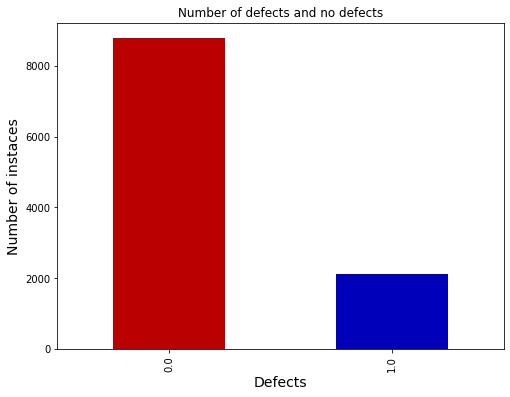

In [9]:
# First step is checking the frequency of each class 
ax=Dataset['defects'].value_counts().plot(kind='bar',color = ['#BB0000', '#0000BB'],
                                          title='Number of defects and no defects',figsize=(8, 6))
ax.set_xlabel("Defects",fontsize=14)
ax.set_ylabel("Number of instaces",fontsize=14)
plt.show()

**As it is observed that , the dataset is imbalanced and there is a big bias to one class
 so that will affect the accuracy of model badly**

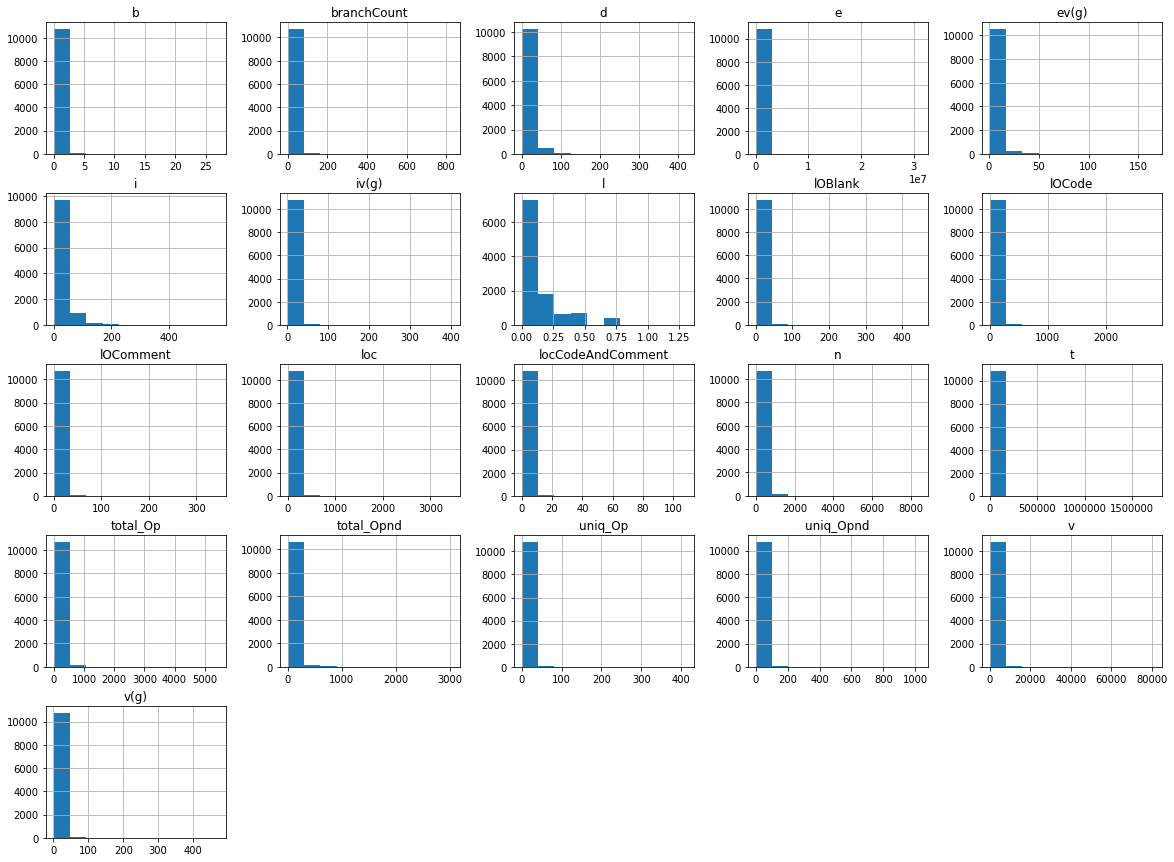

In [10]:
Dataset.iloc[:,:-1].hist(figsize=(20, 15))
plt.show()

**Histograms of features that show the features are not normaly distrubuted , so it may contains many outliers **

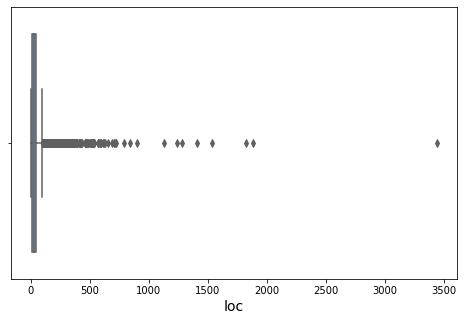

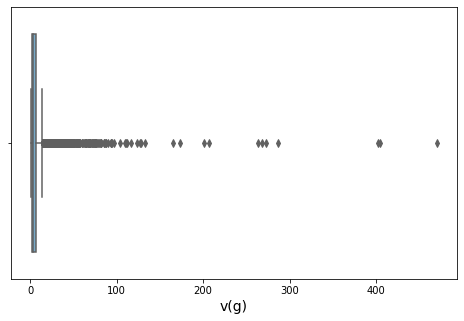

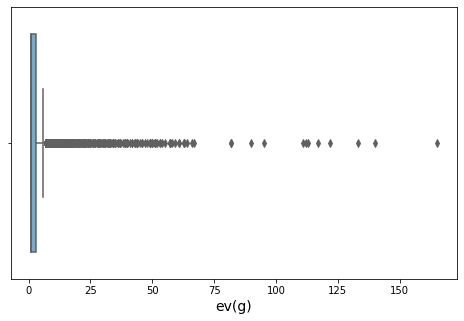

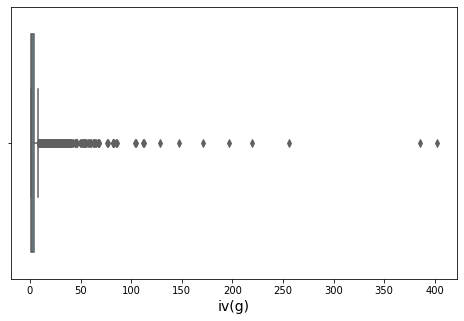

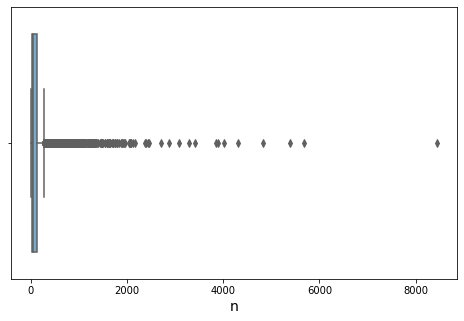

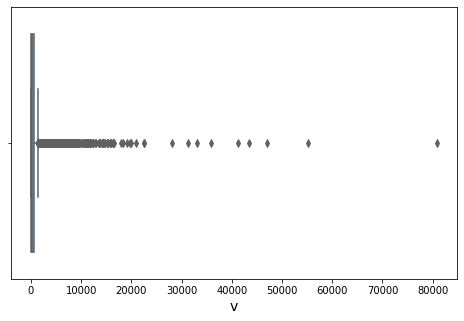

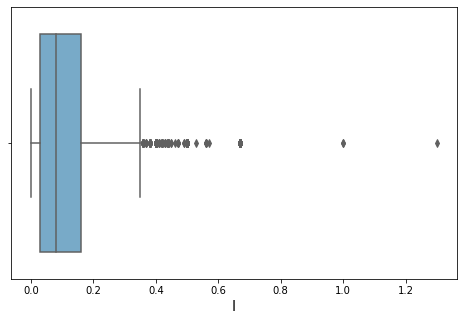

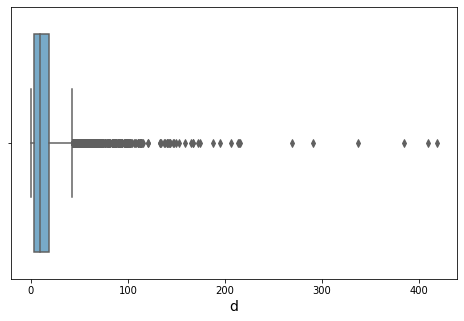

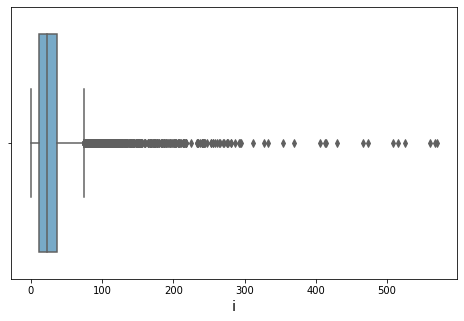

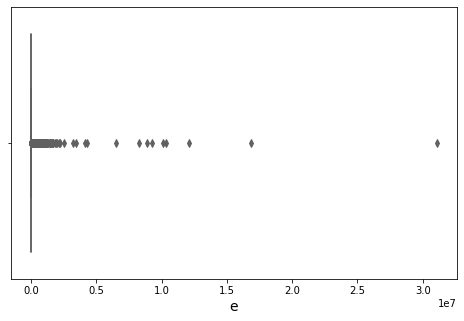

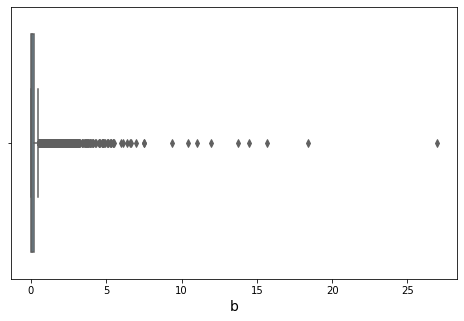

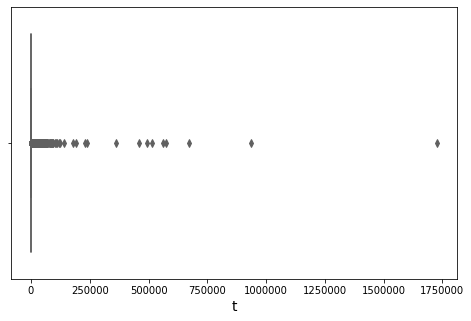

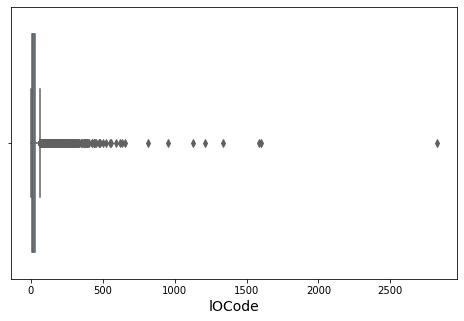

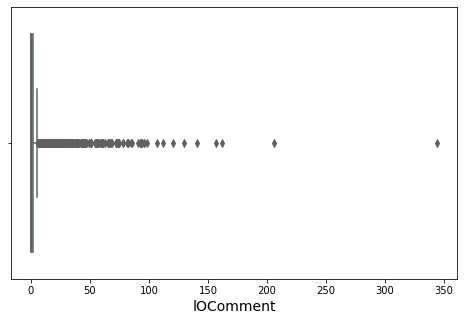

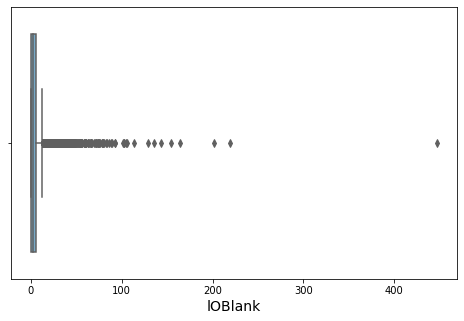

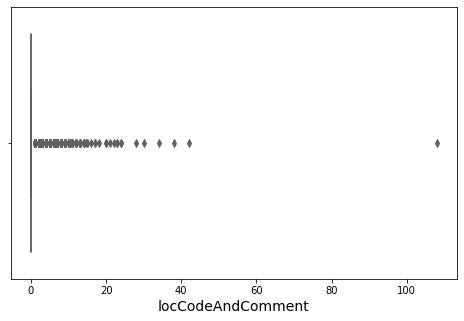

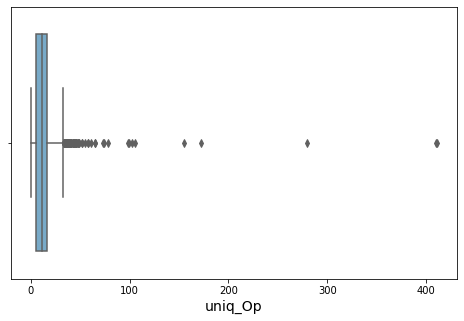

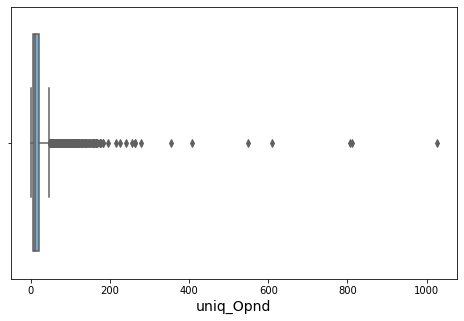

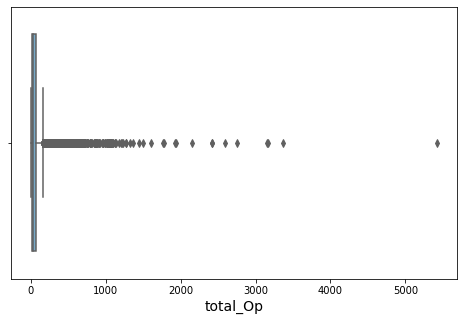

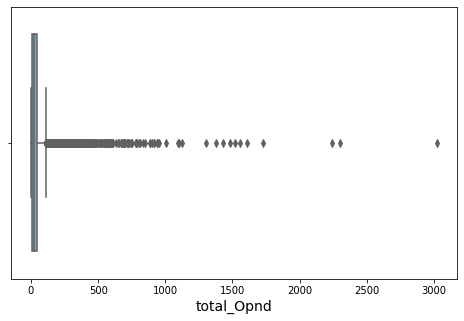

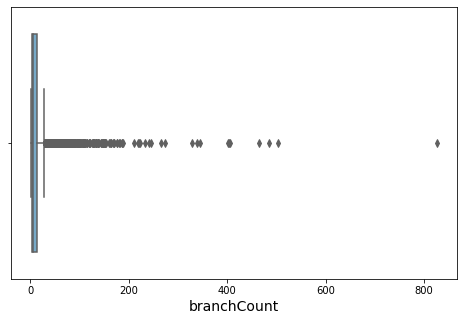

In [11]:
# Plotting box and whisker to ensure of if there are many outliers
for i in Dataset.iloc[:,:-1]:
    plt.figure(figsize=(8,5))
    ax = sns.boxplot(x=Dataset[i],palette="Blues")
    ax.set_xlabel(i,fontsize=14)
    plt.show()

** As expeceted dataset contains huge number of outliers that may affect the accuracy of the training models**

In [12]:
# Showing the correlation values to see importance of each feature
corr = Dataset.corr()
corr 

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
loc,1.000000,0.817795,0.517599,0.784060,0.881790,0.900290,-0.286592,0.689529,0.499926,0.750578,...,0.921915,0.612873,0.803572,0.278119,0.536681,0.764622,0.880967,0.868275,0.830194,0.245437
v(g),0.817795,1.000000,0.701673,0.859591,0.730810,0.759910,-0.252825,0.669091,0.303072,0.709539,...,0.799949,0.384557,0.538381,0.209838,0.647430,0.700514,0.744164,0.696078,0.971958,0.208670
ev(g),0.517599,0.701673,1.000000,0.639572,0.466024,0.445931,-0.233862,0.434036,0.213267,0.315572,...,0.454634,0.294292,0.338253,0.190962,0.263000,0.337031,0.479935,0.435518,0.785553,0.172935
iv(g),0.784060,0.859591,0.639572,1.000000,0.702411,0.743192,-0.197696,0.575354,0.309715,0.757721,...,0.775872,0.351609,0.541284,0.207040,0.500750,0.617966,0.715244,0.668940,0.858994,0.181981
n,0.881790,0.730810,0.466024,0.702411,1.000000,0.984277,-0.240736,0.808101,0.651189,0.716556,...,0.944380,0.596409,0.798548,0.284404,0.610412,0.836171,0.995689,0.989484,0.747894,0.204087
v,0.900290,0.759910,0.445931,0.743192,0.984277,1.000000,-0.198092,0.752202,0.598730,0.800013,...,0.962077,0.576869,0.792323,0.266544,0.606993,0.852296,0.981565,0.971960,0.759971,0.189113
l,-0.286592,-0.252825,-0.233862,-0.197696,-0.240736,-0.198092,1.000000,-0.347213,-0.166792,-0.062034,...,-0.218360,-0.165945,-0.223636,-0.106154,-0.305331,-0.234892,-0.237325,-0.241023,-0.279126,-0.164721
d,0.689529,0.669091,0.434036,0.575354,0.808101,0.752202,-0.347213,1.000000,0.398085,0.574341,...,0.768175,0.502181,0.637171,0.253819,0.749305,0.639686,0.817546,0.777732,0.671976,0.169442
i,0.499926,0.303072,0.213267,0.309715,0.651189,0.598730,-0.166792,0.398085,1.000000,0.209277,...,0.563897,0.392598,0.572311,0.217834,0.391646,0.726696,0.620676,0.687891,0.325796,0.192643
e,0.750578,0.709539,0.315572,0.757721,0.716556,0.800013,-0.062034,0.574341,0.209277,1.000000,...,0.809090,0.384808,0.600673,0.148690,0.482061,0.586805,0.735802,0.673490,0.667886,0.086092


## Preprocessing

In [13]:
# First Divding the dataset to x and y 
x_Dataset=Dataset.iloc[:,:-1]
y_Dataset=Dataset.iloc[:,-1]

In [14]:
# Spilting the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(x_Dataset, y_Dataset, test_size=0.2,random_state=42)
print(x_train.shape, x_test.shape)

(8704, 21) (2176, 21)


In [15]:
# Standarzing the data
sc= StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [16]:
# Defining Function that shows the accuracies of models
def showAcc(model,x_train,y_train,y_test,y_pred):
    print("ACC of model: %.4f" %accuracy_score(y_pred,y_test))
    kfold = model_selection.KFold(n_splits=5)
    accuracy_results = cross_val_score(model, x_train, y_train, cv=kfold)
    accuracyMessage = "KFold Acc : %.4f  " % ( accuracy_results.mean())
    print(accuracyMessage)
    m=precision_recall_fscore_support(y_test, y_pred, average='macro')
    print(f"Precision : {m[0]:.4f} Recall : {m[1]:.4f} Fscore : {m[2]:.4f}" )
    plot_confusion_matrix(model,x_test,y_test,cmap='Purples')
    plt.title('Confusion matrix of the model of the model')
    plt.ylabel('Contain Defect?')
    plt.show()

#  ML Models 

###  DecisionTree model

In [17]:
# Traning logistic Regression model
TreeModel = DecisionTreeClassifier()
TreeModel = TreeModel.fit(x_train, y_train)
y_pred = TreeModel.predict(x_test)

ACC of model: 0.7601
KFold Acc : 0.7440  
Precision : 0.6162 Recall : 0.6179 Fscore : 0.6170


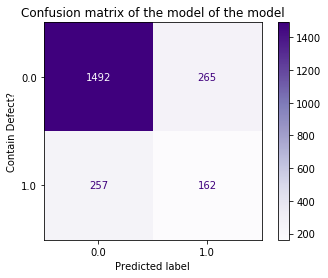

In [18]:
showAcc(TreeModel,x_train,y_train,y_test,y_pred)

###  Support Vector Machine

In [19]:
# Training DecsionTree
SVM_Model= svm.SVC().fit(x_train, y_train)
y_pred = SVM_Model.predict(x_test)

ACC of model: 0.8120
KFold Acc : 0.8151  
Precision : 0.6927 Recall : 0.5428 Fscore : 0.5355


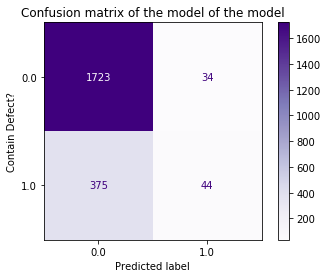

In [20]:
showAcc(SVM_Model,x_train,y_train,y_test,y_pred)

### K-Nearest Neighbors

In [21]:
# Training KNN
Knn_Model = KNeighborsClassifier().fit(x_train, y_train)
y_pred = Knn_Model.predict(x_test)

ACC of model: 0.7891
KFold Acc : 0.8012  
Precision : 0.6314 Recall : 0.5895 Fscore : 0.6005


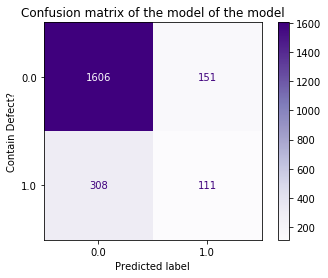

In [22]:
showAcc(Knn_Model,x_train,y_train,y_test,y_pred)

**Accuracy of models prove that the imbalance of data base affect the accuracy badly . only few numbers from 1684 of the minority is classified correct , so we have to solve the imbalance of data to icrease the acc**

## Leaining Curves

In [23]:
# Drawing learning curves 
train_sizes_TR, train_scores_TR, valid_scores_TR, *_ = learning_curve(TreeModel, x_Dataset, y_Dataset, scoring='accuracy',n_jobs=-1,
                                                        shuffle=True)

train_sizes_svr, train_scores_svr, valid_scores_svr, *_ = learning_curve(SVM_Model, x_Dataset, y_Dataset, scoring='accuracy',n_jobs=-1,
                                                        shuffle=True)

train_sizes_knn, train_scores_knn, valid_scores_knn, *_ = learning_curve(Knn_Model, x_Dataset, y_Dataset, scoring='accuracy',n_jobs=-1, 
                                                    shuffle=True)

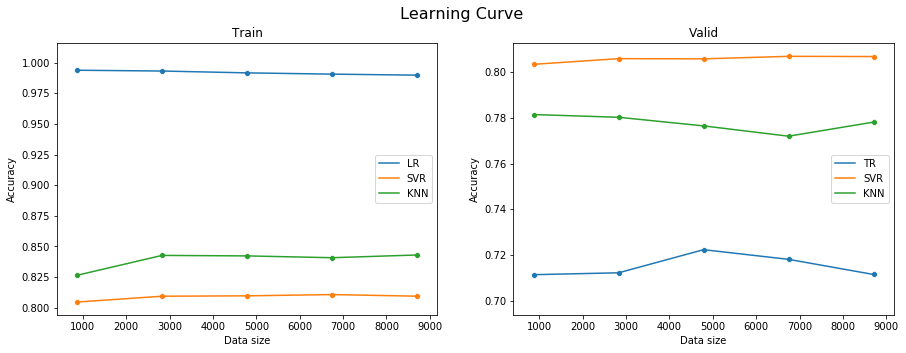

In [24]:
# Drawing the Learning curves for the 3 models
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Learning Curve', fontsize=16)
# The Training Plots
sns.scatterplot(ax=axes[0], x=train_sizes_TR, y=train_scores_TR.mean(axis=1))
sns.lineplot(ax=axes[0], x=train_sizes_TR, y=train_scores_TR.mean(axis=1))
sns.scatterplot(ax=axes[0], x=train_sizes_svr, y=train_scores_svr.mean(axis=1))
sns.lineplot(ax=axes[0], x=train_sizes_svr, y=train_scores_svr.mean(axis=1))
sns.scatterplot(ax=axes[0], x=train_sizes_knn, y=train_scores_knn.mean(axis=1))
sns.lineplot(ax=axes[0], x=train_sizes_knn, y=train_scores_knn.mean(axis=1))
axes[0].set_title('Train')
axes[0].set_xlabel('Data size')
axes[0].set_ylabel('Accuracy')
axes[0].legend(['LR', 'SVR', 'KNN'])

# The Validation Plots
sns.scatterplot(ax=axes[1], x=train_sizes_TR,y=valid_scores_TR.mean(axis=1))
sns.lineplot(ax=axes[1], x=train_sizes_TR,y=valid_scores_TR.mean(axis=1))
sns.scatterplot(ax=axes[1], x=train_sizes_svr,y= valid_scores_svr.mean(axis=1))
sns.lineplot(ax=axes[1], x=train_sizes_svr,y= valid_scores_svr.mean(axis=1))
sns.scatterplot(ax=axes[1], x=train_sizes_knn, y=valid_scores_knn.mean(axis=1))
sns.lineplot(ax=axes[1], x=train_sizes_knn,y= valid_scores_knn.mean(axis=1))
axes[1].set_title('Valid')
axes[1].set_xlabel('Data size')
axes[1].set_ylabel('Accuracy')
axes[1].legend(['TR', 'SVR', 'KNN'])
plt.show()

<strong>It is noted that the models aren't learning , when the data is increased because of the bias of data to one class</strong>


# Methods of Increasing accurcy
### As it is concluded , the dataset contaions many problems such as imbalancing and outliers, so it is important to deal with these problems to increase the accuracy 

##  Remove Outliers

In [25]:
# Copying the dataset
DS_No_Out=Dataset.copy()

In [26]:
# Selecting coloums that reduce the size of dataset without removing big number of rows
# Using IQR method to remove outliers
DS_No_Out['outlier']=False
# Selecting the most 5 important features in dataset
for col in ['branchCount','uniq_Opnd','total_Op','total_Opnd']:
#for col in DS_No_Out.iloc[:,:-1]:
    #DSnoOut['zScore']=(DSnoOut[col]-DSnoOut[col].mean()) /DSnoOut[col].std()
    q3=Dataset[col].quantile(.75)
    q1=Dataset[col].quantile(.25)
    IQR=q3-q1
    lower=q1-1.5*IQR
    upper=q3+1.5*IQR
    DS_No_Out.loc[DS_No_Out[col]>upper,'outlier']= True
    DS_No_Out.loc[DS_No_Out[col]<lower,'outlier']= True

In [27]:
#Then selecting outliers and drop rows
DS_No_Out=DS_No_Out[DS_No_Out['outlier'] == False]
DS_No_Out.drop(['outlier'],axis=1,inplace=True)
len(DS_No_Out)

9386

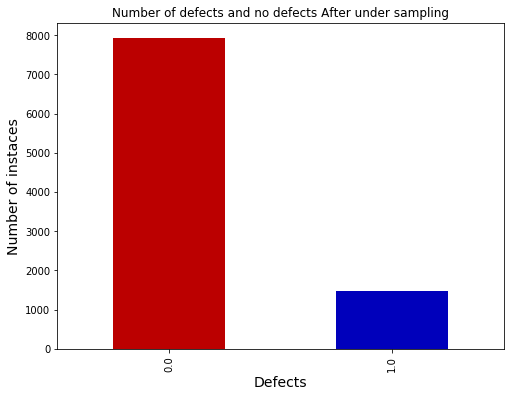

In [28]:
# Drawing number of instances of each class
ax=DS_No_Out['defects'].value_counts().plot(kind='bar',color = ['#BB0000', '#0000BB'],
                                          title='Number of defects and no defects After under sampling',figsize=(8, 6))
ax.set_xlabel("Defects",fontsize=14)
ax.set_ylabel("Number of instaces",fontsize=14)
plt.show()

**it observed that most removed outliers were from the minority class , it may increase the acc because the majority class will be classified as true , but the minority class will be classified as false , so it is not the right way to solve the dataset** 

In [29]:
# Then separting dataset againd and standarzing it 
x_Dataset=DS_No_Out.iloc[:,:-1]
y_Dataset=DS_No_Out['defects']
x_train, x_test, y_train, y_test = train_test_split(x_Dataset, y_Dataset, test_size=0.2,random_state=42)
sc= StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

### Tree regression after outliers

In [30]:
# Learning Tr after removing the outliers to check the new accuracy
TR2=DecisionTreeClassifier().fit(x_train, y_train)
y_pred = TR2.predict(x_test)

ACC of model: 0.7859
KFold Acc : 0.7754  
Precision : 0.6082 Recall : 0.6212 Fscore : 0.6137


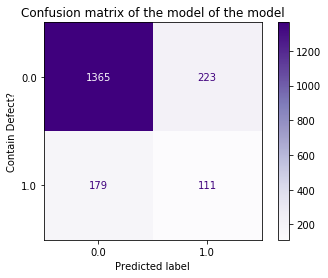

In [31]:
showAcc(TR2,x_train,y_train,y_test,y_pred)

### SVM after outliers

In [32]:
# SVM
SVM_Model2=svm.SVC().fit(x_train, y_train)
y_pred = SVM_Model2.predict(x_test)

ACC of model: 0.8466
KFold Acc : 0.8438  
Precision : 0.9232 Recall : 0.5034 Fscore : 0.4653


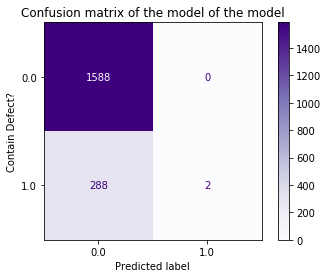

In [33]:
showAcc(SVM_Model2,x_train,y_train,y_test,y_pred)

## KNN after outliers

In [34]:
Knn_Model2 = KNeighborsClassifier().fit(x_train, y_train)
y_pred = Knn_Model2.predict(x_test)

ACC of model: 0.8269
KFold Acc : 0.8259  
Precision : 0.6114 Recall : 0.5538 Fscore : 0.5616


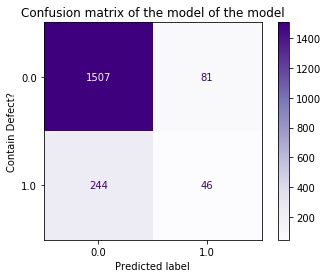

In [35]:
showAcc(Knn_Model2,x_train,y_train,y_test,y_pred)

**As expected removing outliers will increase the accuracy , beacause of removing instances of minority classes , so the data has not solved**

## Learning curves After outliers


In [36]:
# Drawing learning curves 
train_sizes_TR2, train_scores_TR2, valid_scores_TR2, *_ = learning_curve(TR2, x_Dataset, y_Dataset, scoring='accuracy',n_jobs=-1
                                                        ,random_state=42, cv=3,shuffle=True)

train_sizes_svr2, train_scores_svr2, valid_scores_svr2, *_ = learning_curve(SVM_Model2, x_Dataset, y_Dataset, scoring='accuracy',n_jobs=-1
                                                        ,random_state=42, cv=3,shuffle=True)

train_sizes_knn2, train_scores_knn2, valid_scores_knn2, *_ = learning_curve(Knn_Model2, x_Dataset, y_Dataset, scoring='accuracy',n_jobs=-1 
                                                        ,random_state=42, cv=3,shuffle=True)

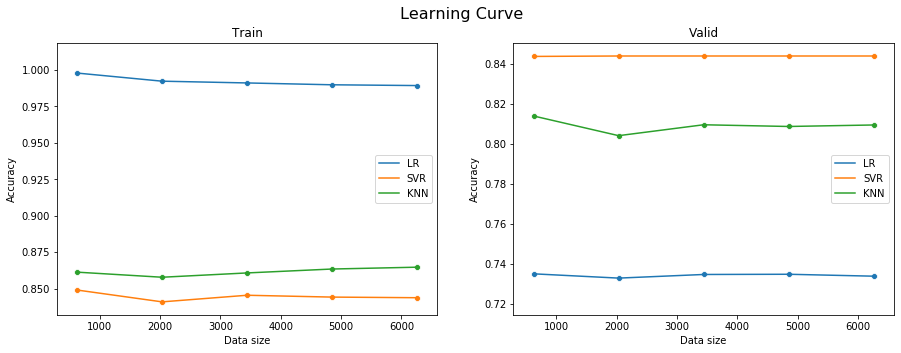

In [37]:
# Drawing the Learning curves for the 3 models
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Learning Curve', fontsize=16)
# The Training Plots
sns.scatterplot(ax=axes[0], x=train_sizes_TR2, y=train_scores_TR2.mean(axis=1))
sns.lineplot(ax=axes[0], x=train_sizes_TR2, y=train_scores_TR2.mean(axis=1))
sns.scatterplot(ax=axes[0], x=train_sizes_svr2, y=train_scores_svr2.mean(axis=1))
sns.lineplot(ax=axes[0], x=train_sizes_svr2, y=train_scores_svr2.mean(axis=1))
sns.scatterplot(ax=axes[0], x=train_sizes_knn2, y=train_scores_knn2.mean(axis=1))
sns.lineplot(ax=axes[0], x=train_sizes_knn2, y=train_scores_knn2.mean(axis=1))
axes[0].set_title('Train')
axes[0].set_xlabel('Data size')
axes[0].set_ylabel('Accuracy')
axes[0].legend(['LR', 'SVR', 'KNN'])

# The Validation Plots
sns.scatterplot(ax=axes[1], x=train_sizes_TR2,y=valid_scores_TR2.mean(axis=1))
sns.lineplot(ax=axes[1], x=train_sizes_TR2,y=valid_scores_TR2.mean(axis=1))
sns.scatterplot(ax=axes[1], x=train_sizes_svr2,y= valid_scores_svr2.mean(axis=1))
sns.lineplot(ax=axes[1], x=train_sizes_svr2,y= valid_scores_svr2.mean(axis=1))
sns.scatterplot(ax=axes[1], x=train_sizes_knn2, y=valid_scores_knn2.mean(axis=1))
sns.lineplot(ax=axes[1], x=train_sizes_knn2,y= valid_scores_knn2.mean(axis=1))
axes[1].set_title('Valid')
axes[1].set_xlabel('Data size')
axes[1].set_ylabel('Accuracy')
axes[1].legend(['LR', 'SVR', 'KNN'])
plt.show()

**After removing outliers , it is noted that models are n't learning as expected ,during increasing the number instances .
Learning curves are increased compare to the first data, but that is inaccurate because it removes more instances the minority class which causes identifying more majority class instances**

## under sampling

In [38]:
# Copying the dataset
newDS=Dataset.copy()
x_Dataset=Dataset.iloc[:,:-1]
y_Dataset=Dataset['defects']

In [39]:
# Using NearMiss method to undersampling the data
sampler = NearMiss(version=1,sampling_strategy={0: 3000,1: 2103})
x_DS, y_DS = sampler.fit_sample(x_Dataset, y_Dataset)

In [40]:
# spliting the new data and scale the features
x_train, x_test, y_train, y_test = train_test_split(x_DS,y_DS, test_size=0.2,random_state=42)
sc= StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

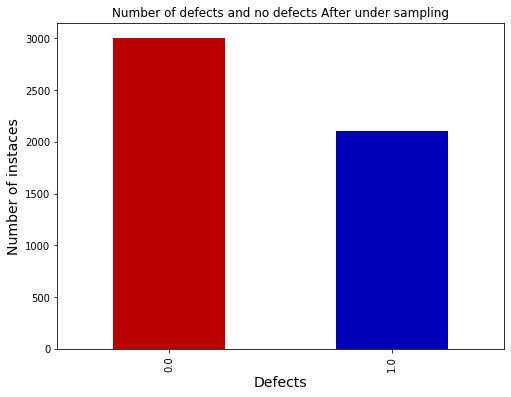

In [41]:
# As observed after undersampling , the two classes are balanced 
ax=y_DS.value_counts().plot(kind='bar',color = ['#BB0000', '#0000BB'],
                                          title='Number of defects and no defects After under sampling',figsize=(8, 6))
ax.set_xlabel("Defects",fontsize=14)
ax.set_ylabel("Number of instaces",fontsize=14)
plt.show()

## Tree regression after undersampling

In [42]:
TRmodel3=DecisionTreeClassifier().fit(x_train, y_train)
y_pred = TRmodel3.predict(x_test)

ACC of model: 0.8580
KFold Acc : 0.8474  
Precision : 0.8537 Recall : 0.8511 Fscore : 0.8523


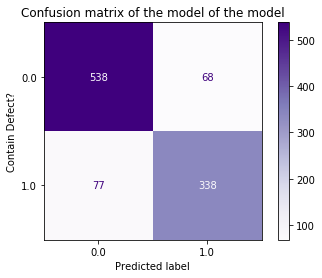

In [43]:
showAcc(TRmodel3,x_train,y_train,y_test,y_pred)

## SVM after undersampling

In [44]:
SVM_Model3=svm.SVC().fit(x_train, y_train)
y_pred = SVM_Model3.predict(x_test)

ACC of model: 0.8962
KFold Acc : 0.8763  
Precision : 0.9137 Recall : 0.8768 Fscore : 0.8882


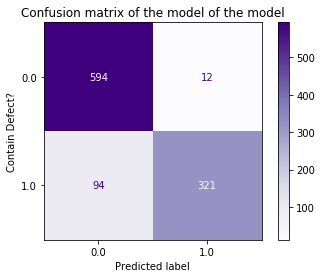

In [45]:
showAcc(SVM_Model3,x_train,y_train,y_test,y_pred)

## KNN after undersampling

In [46]:
Knn_Model3 = KNeighborsClassifier().fit(x_train, y_train)
y_pred = Knn_Model3.predict(x_test)

ACC of model: 0.8756
KFold Acc : 0.8660  
Precision : 0.8781 Recall : 0.8629 Fscore : 0.8687


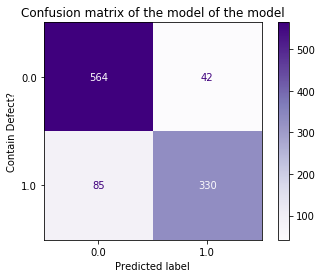

In [47]:
showAcc(Knn_Model3,x_train,y_train,y_test,y_pred)

**Finally , using undersampling techniques provided the best accuracy , as all the models can predict the two classes with high numbers**